      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000
Cluster1 correct: 6, incorrect: 2, class: 2
****************************************
Cluster2 correct: 5, incorrect: 2, class: 0
****************************************
Cluster3 correct: 8, incorrect: 2, class: 0
****************************************


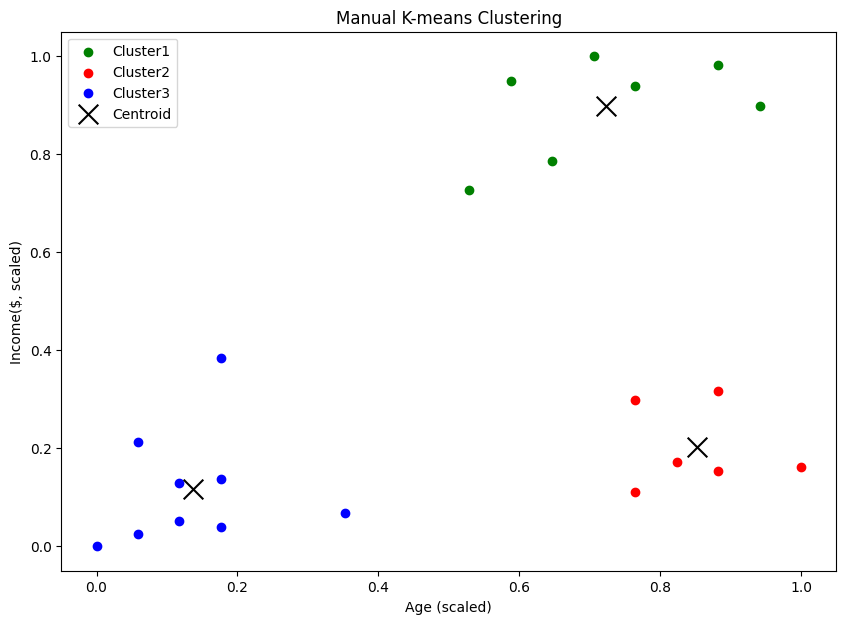

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv(r"income.csv")
print(df.head())

# Use Age and Income columns only
X = df[['Age', 'Income($)']].values

rows = X.shape[0]
columns = X.shape[1]

# Optionally scale (to match sklearn example)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---- Manual K-means ----

# Pick 3 initial centroids by row index, like MATLAB
cent1 = X_scaled[5, :]   # e.g., row 6 in 0-based Python
cent2 = X_scaled[10, :]  # row 11
cent3 = X_scaled[15, :]  # row 16

n = 0
max_iter = 90

# Dummy cluster labels (just for final match check)
labels = []
for age, income in X_scaled:
    if income < 0.3:
        labels.append(0)
    elif income < 0.7:
        labels.append(1)
    else:
        labels.append(2)
labels = np.array(labels)

# First assignment
cluster1 = []
classify1 = []
cluster2 = []
classify2 = []
cluster3 = []
classify3 = []

for k in range(rows):
    c = X_scaled[k, :]
    cl = labels[k]
    d1 = np.linalg.norm(cent1 - c)
    d2 = np.linalg.norm(cent2 - c)
    d3 = np.linalg.norm(cent3 - c)
    min_dist = min(d1, d2, d3)

    if min_dist == d1:
        cluster1.append(c)
        classify1.append(cl)
    elif min_dist == d2:
        cluster2.append(c)
        classify2.append(cl)
    else:
        cluster3.append(c)
        classify3.append(cl)

# Repeat K-means loop
while n <= max_iter:
    if len(cluster1) > 0:
        cent1 = np.mean(cluster1, axis=0)
    if len(cluster2) > 0:
        cent2 = np.mean(cluster2, axis=0)
    if len(cluster3) > 0:
        cent3 = np.mean(cluster3, axis=0)

    cluster1 = []
    cluster2 = []
    cluster3 = []
    classify1 = []
    classify2 = []
    classify3 = []

    for k in range(rows):
        c = X_scaled[k, :]
        cl = labels[k]
        d1 = np.linalg.norm(cent1 - c)
        d2 = np.linalg.norm(cent2 - c)
        d3 = np.linalg.norm(cent3 - c)
        min_dist = min(d1, d2, d3)

        if min_dist == d1:
            cluster1.append(c)
            classify1.append(cl)
        elif min_dist == d2:
            cluster2.append(c)
            classify2.append(cl)
        else:
            cluster3.append(c)
            classify3.append(cl)

    n += 1

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)

# Correction function
def classify_correction(y):
    first = []
    second = []
    third = []
    first.append(0)
    second.append(1)
    index1 = 1
    index2 = 1
    index3 = 0

    for i in range(1, len(y)):
        if y[i] == first[0]:
            index1 += 1
            first.append(y[i])
        elif y[i] == second[0]:
            index2 += 1
            second.append(y[i])
        else:
            index3 += 1
            third.append(y[i])

    max1 = max(len(first), len(second))
    max2 = max(max1, len(third))

    if max2 == len(first):
        corr = len(first)
        incorr = len(second) + len(third)
        cl = first[0]
    elif max2 == len(second):
        corr = len(second)
        incorr = len(first) + len(third)
        cl = second[0]
    else:
        corr = len(third)
        incorr = len(first) + len(second)
        cl = third[0]

    return corr, incorr, cl

# Show results
corr, incorr, cl = classify_correction(classify1)
print(f'Cluster1 correct: {corr}, incorrect: {incorr}, class: {cl}')
print('*' * 40)

corr, incorr, cl = classify_correction(classify2)
print(f'Cluster2 correct: {corr}, incorrect: {incorr}, class: {cl}')
print('*' * 40)

corr, incorr, cl = classify_correction(classify3)
print(f'Cluster3 correct: {corr}, incorrect: {incorr}, class: {cl}')
print('*' * 40)

# Plot manually
plt.figure(figsize=(10, 7))
if len(cluster1) > 0:
    plt.scatter(cluster1[:, 0], cluster1[:, 1], color='green', label='Cluster1')
if len(cluster2) > 0:
    plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', label='Cluster2')
if len(cluster3) > 0:
    plt.scatter(cluster3[:, 0], cluster3[:, 1], color='blue', label='Cluster3')

plt.scatter(cent1[0], cent1[1], color='black', marker='x', s=200, label='Centroid')
plt.scatter(cent2[0], cent2[1], color='black', marker='x', s=200)
plt.scatter(cent3[0], cent3[1], color='black', marker='x', s=200)

plt.xlabel('Age (scaled)')
plt.ylabel('Income($, scaled)')
plt.title('Manual K-means Clustering')
plt.legend()
plt.show()
